In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shubhambathwal/flight-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/flight-price-prediction


In [2]:
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
os.listdir(path)

['business.csv', 'economy.csv', 'Clean_Dataset.csv']

In [4]:
c_path=os.path.join(path, 'Clean_Dataset.csv')
b_path=os.path.join(path, 'business.csv')
e_path=os.path.join(path, 'economy.csv')

In [5]:
import pandas as pd

In [6]:
c_data=pd.read_csv(c_path)

In [7]:
b_data=pd.read_csv(b_path)
e_data=pd.read_csv(e_path)

In [8]:
c_data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [9]:
c_data.shape

(300153, 12)

In [10]:
b_data.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [11]:
b_data.shape

(93487, 11)

In [12]:
e_data.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [13]:
e_data.shape

(206774, 11)

In [14]:
c_data['class'].value_counts()

,count
class,
Economy,206666
Business,93487


In [15]:
def value_count(data):
    col=data.columns
    for column in col:
        print('\n','='*6, column, '='*6,'\n')
        n_count=data[column].value_counts()
        p_count=data[column].value_counts(normalize=True)*100
        results=pd.DataFrame({'counts':n_count, 'percentage':p_count.values.round(2)})
        print(results)

In [16]:
value_count(c_data)


 ====== Unnamed: 0 ====== 

            counts  percentage
Unnamed: 0                    
300152           1         0.0
0                1         0.0
1                1         0.0
2                1         0.0
3                1         0.0
...            ...         ...
28               1         0.0
29               1         0.0
30               1         0.0
31               1         0.0
32               1         0.0

[300153 rows x 2 columns]

 ====== airline ====== 

           counts  percentage
airline                      
Vistara    127859       42.60
Air_India   80892       26.95
Indigo      43120       14.37
GO_FIRST    23173        7.72
AirAsia     16098        5.36
SpiceJet     9011        3.00

 ====== flight ====== 

         counts  percentage
flight                     
UK-706     3235        1.08
UK-772     2741        0.91
UK-720     2650        0.88
UK-836     2542        0.85
UK-822     2468        0.82
...         ...         ...
6E-3211       1        0.0

In [17]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [18]:
c_data.isnull().sum()

,0
Unnamed: 0,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [19]:
c_data.describe(exclude='object')

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [20]:
#price is skewed, prices of business class is
#pulling the mean closer to it

In [21]:
c_data.describe(include='object')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


In [22]:
#most flights departed from delhi and most had
#destination as mumbai, it's also possible
#people who are going to mumbai are using
#business class more if they are flying from
#dehli

In [23]:
c_data['Unnamed: 0'].nunique()

300153

In [24]:
data=c_data.drop(['Unnamed: 0'], axis=1)

In [25]:
data.shape

(300153, 11)

In [26]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [27]:
def plots1(data, dataa):
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.boxplot(data)
    plt.show()
    if data.dtype == "dtype('int64')":
        plt.scatter(data, dataa)
        plt.show()

In [28]:
data.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

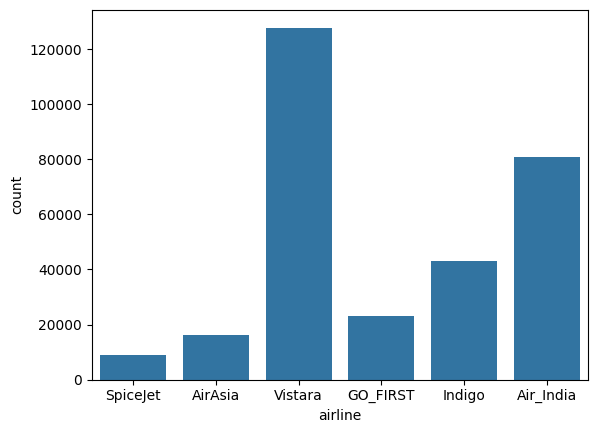

In [29]:
sns.countplot(x='airline', data=data)
plt.show()

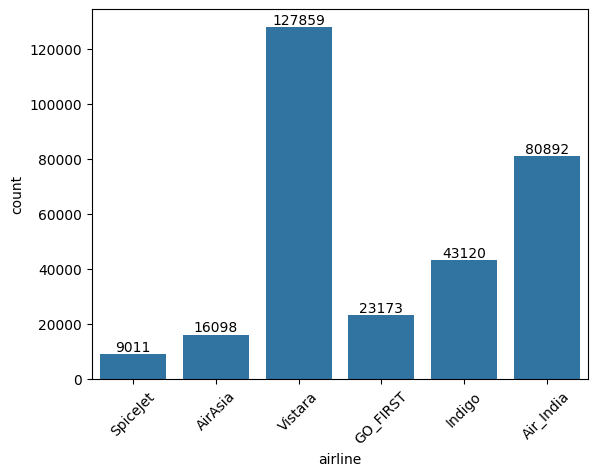

In [30]:
ax=sns.countplot(x='airline', data=data)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation=45)
plt.show()

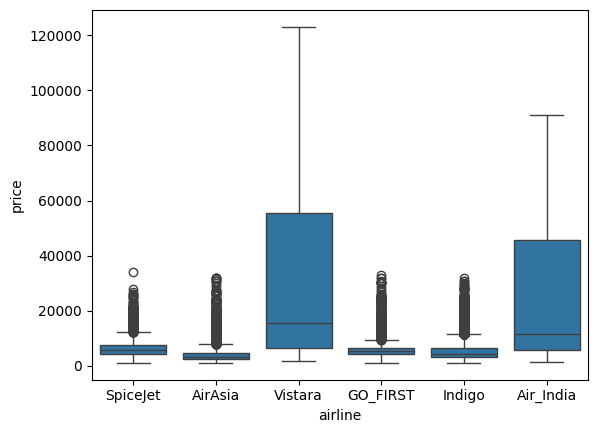

In [31]:
sns.boxplot(x='airline', y='price', data=data)
plt.show()

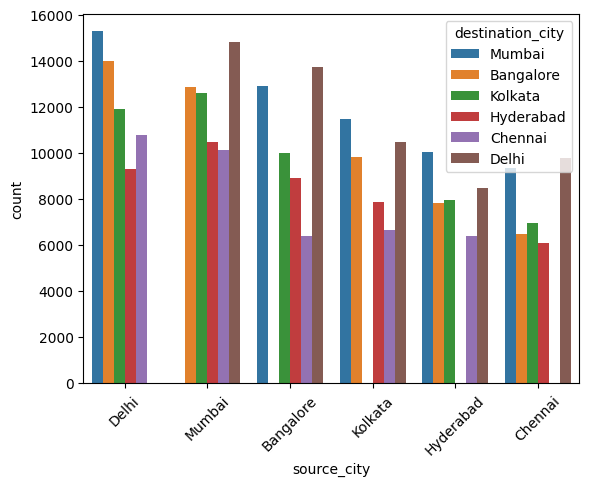

In [32]:
sns.countplot(x='source_city', hue='destination_city', data=data)
plt.xticks(rotation=45)
plt.show()

In [33]:
#top destination are delhi, mumbai and people
#from delhi and mumbai are mostly going to
#each other and banglore and kolkata are also
#prefered
#these people might be buying more bussiness
#class tickets

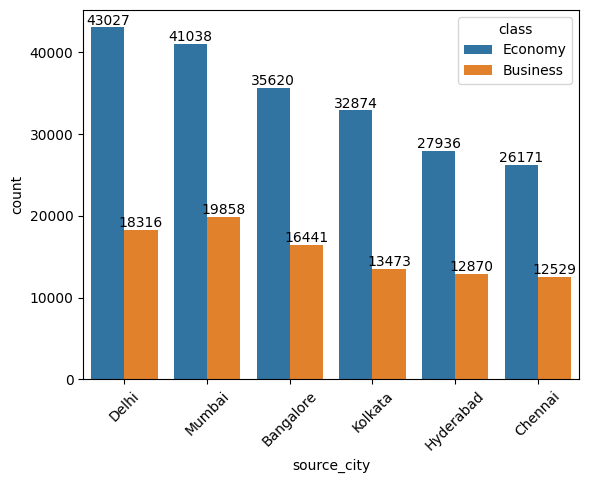

In [34]:
ax=sns.countplot(x='source_city', hue='class', data=data)
for i in ax.containers:    ax.bar_label(i)
plt.xticks(rotation=45)
plt.show()

In [35]:
data.groupby('source_city').size()

,0
source_city,
Bangalore,52061
Chennai,38700
Delhi,61343
Hyderabad,40806
Kolkata,46347
Mumbai,60896


In [36]:
business=data[data['class']=='Business'].groupby('source_city').size()

In [37]:
total=data.groupby('source_city').size()

In [38]:
percent=pd.concat([business, total], axis=1)

In [39]:
percent['perc']=round(percent[0]/percent[1], 2)

In [40]:
percent

,0,1,perc
source_city,,,
Bangalore,16441,52061,0.32
Chennai,12529,38700,0.32
Delhi,18316,61343,0.30
Hyderabad,12870,40806,0.32
Kolkata,13473,46347,0.29
Mumbai,19858,60896,0.33


In [41]:
#difference is not significant, people are
#buying business class almost equally
#in kolkata it's slightly less even after more
#flights as compared to hyderabad and chennai

In [42]:
data.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

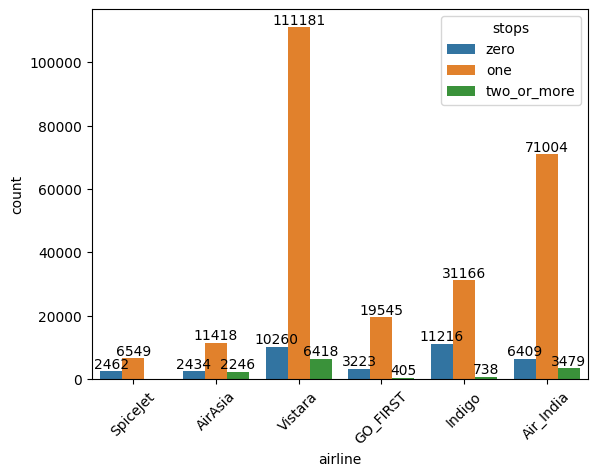

In [43]:
ax=sns.countplot(x='airline', hue='stops', data=data)
for i in ax.containers:    ax.bar_label(i)
plt.xticks(rotation=45)
plt.show()

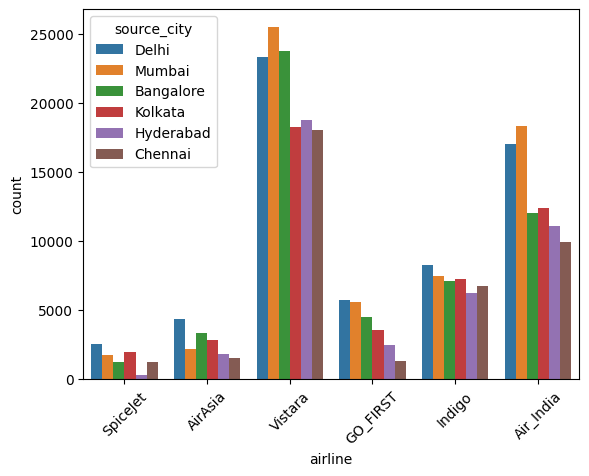

In [44]:
ax=sns.countplot(x='airline', hue='source_city', data=data)
plt.xticks(rotation=45)
plt.show()

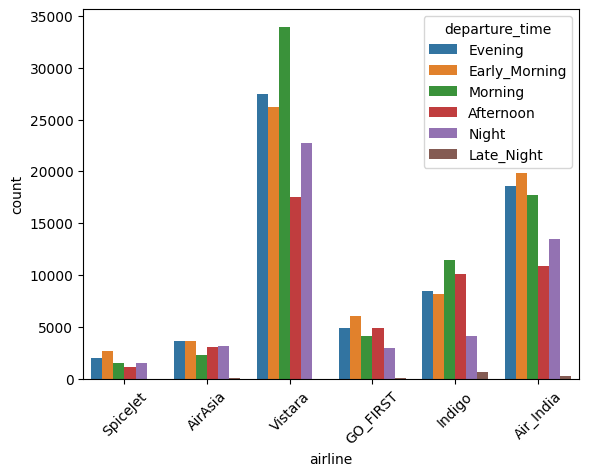

In [45]:
ax=sns.countplot(x='airline', hue='departure_time', data=data)
plt.xticks(rotation=45)
plt.show()

In [46]:
#most flights are from early morning to
#evening in big airlines and lowest is late night
#in smaller ones afternoon flights are more than
#morning but early morning and evening are consistent

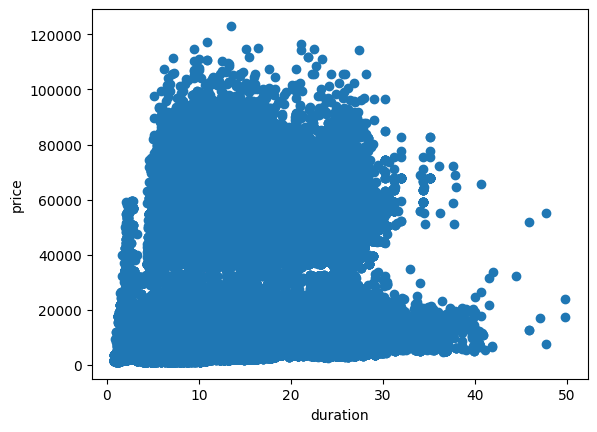

In [47]:
plt.scatter(data['duration'], data['price'])
plt.xlabel('duration')
plt.ylabel('price')
plt.show()

<Axes: xlabel='duration'>

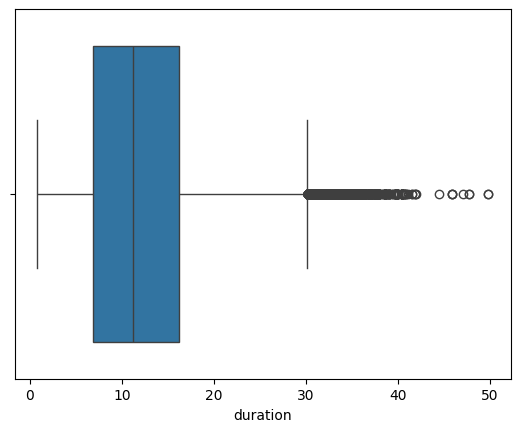

In [48]:
sns.boxplot(x='duration', data=data)

<Axes: xlabel='duration', ylabel='Count'>

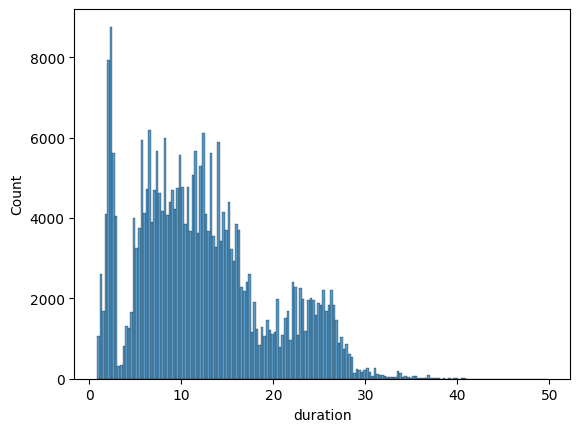

In [49]:
sns.histplot(data['duration'])

<Axes: xlabel='days_left'>

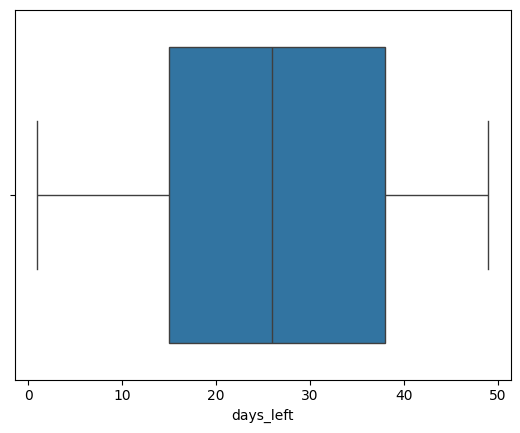

In [50]:
sns.boxplot(x='days_left', data=data)

<Axes: xlabel='days_left', ylabel='Count'>

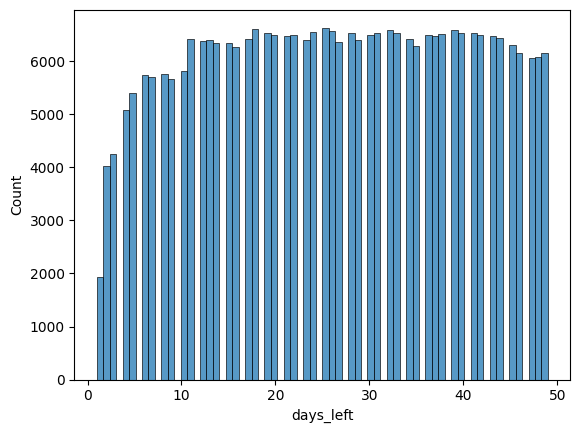

In [51]:
sns.histplot(data['days_left'])

<Axes: xlabel='price'>

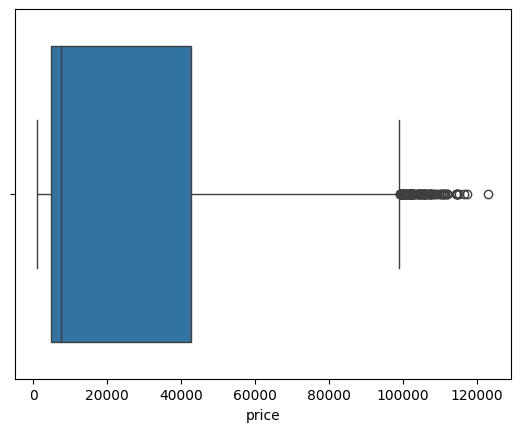

In [52]:
sns.boxplot(x='price', data=data)

<Axes: xlabel='price', ylabel='Count'>

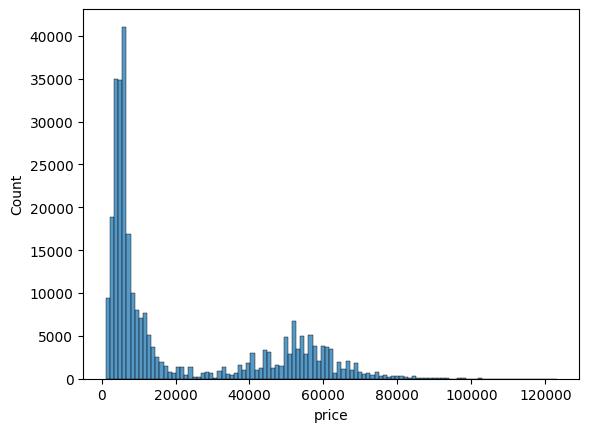

In [53]:
sns.histplot(data['price'])

In [54]:
#price and duration are not normally distributed
#and duration showed multiple trends, price showed
#two trends

In [55]:
data['duration'].nunique()

476

In [56]:
data['days_left'].nunique()

49

In [57]:
data['price'].nunique()

12157

In [58]:
data['duration'].skew()

np.float64(0.6028991297746269)

In [59]:
data['days_left'].skew()

np.float64(-0.03546434955066582)

In [60]:
data['price'].skew()

np.float64(1.0613772532064343)

<Axes: >

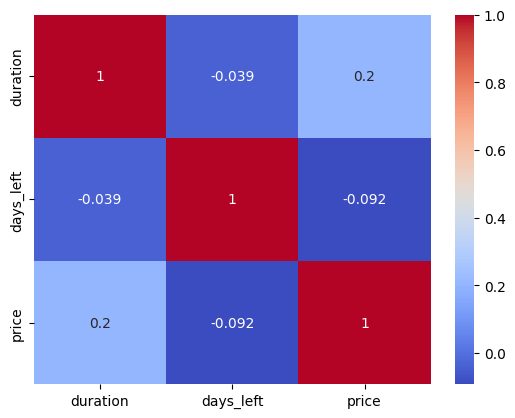

In [61]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [62]:
data['log_price']=np.log1p(data['price'])

In [63]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,log_price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,8.691819
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,8.691819
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,8.692322
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,8.692154
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,8.692154


In [64]:
data.drop(['flight'], axis=1,inplace=True)

In [65]:
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,log_price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,8.691819
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,8.691819
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,8.692322
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,8.692154
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,8.692154


In [66]:
from sklearn.preprocessing import OneHotEncoder

In [67]:
encoder=OneHotEncoder(drop='first')

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
encoded_data=encoder.fit_transform(data[['airline', 'source_city', 'destination_city']])

In [70]:
data['departure_time'].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [71]:
data['departure_time']=data['departure_time'].map({'Early_Morning':0, 'Morning':1, 'Afternoon':2, 'Evening':3, 'Night':4, 'Late_Night':5})

In [72]:
data['departure_time'].unique()

array([3, 0, 1, 2, 4, 5])

In [73]:
data.isnull().sum()

,0
airline,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0
price,0


In [74]:
data['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [75]:
data['stops']=data['stops'].map({'zero':0, 'one':1,'two_or_more':2})

In [76]:
data.isnull().sum()

,0
airline,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0
price,0


In [77]:
data['arrival_time'].unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [78]:
data['arrival_time']=data['arrival_time'].map({'Early_Morning':0, 'Morning':1, 'Afternoon':2, 'Evening':3, 'Night':4, 'Late_Night':5})

In [79]:
data['class']=data['class'].map({'Economy':0, 'Business':1})

In [80]:
data['class'].unique()

array([0, 1])

In [81]:
type(encoded_data)

scipy.sparse._csr.csr_matrix

In [82]:
encoded_data_array=encoded_data.toarray()

In [83]:
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,log_price
0,SpiceJet,Delhi,3,0,4,Mumbai,0,2.17,1,5953,8.691819
1,SpiceJet,Delhi,0,0,1,Mumbai,0,2.33,1,5953,8.691819
2,AirAsia,Delhi,0,0,0,Mumbai,0,2.17,1,5956,8.692322
3,Vistara,Delhi,1,0,2,Mumbai,0,2.25,1,5955,8.692154
4,Vistara,Delhi,1,0,1,Mumbai,0,2.33,1,5955,8.692154


In [84]:
num_data=data[['departure_time', 'stops', 'arrival_time', 'class', 'duration', 'days_left']].values

In [85]:
num_data.shape

(300153, 6)

In [86]:
final_data=np.hstack([num_data, encoded_data_array])
final_data.shape

(300153, 21)

In [87]:
final_target=data['log_price'].values

In [88]:
final_target.shape

(300153,)

In [89]:
x_train, x_test, y_train, y_test=train_test_split(final_data, final_target, test_size=0.2, shuffle=True, random_state=0)

In [90]:
x_train.shape

(240122, 21)

In [91]:
x_test.shape

(60031, 21)

In [92]:
y_train.shape

(240122,)

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
lr=LinearRegression()

In [95]:
lr.fit(x_train, y_train)

LinearRegression()

In [96]:
lr.score(x_train, y_train)

0.9140408376544499

In [97]:
lr.score(x_test, y_test)

0.9137976524717147

In [98]:
test_pred=lr.predict(x_test)

In [99]:
train_predict=lr.predict(x_train)

In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [101]:
mean_absolute_error(y_test, test_pred)

0.25556187049955065

In [102]:
mean_absolute_error(y_train, train_predict)

0.2562629473276695

In [103]:
(0.25556187049955054/np.mean(y_test))*100

np.float64(2.7416212448981243)

In [104]:
from xgboost import XGBRegressor

In [105]:
xg=XGBRegressor()

In [106]:
xg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [107]:
pred=xg.predict(x_test)

In [108]:
xg.score(x_train, y_train)

0.9733198631341088

In [109]:
xg.score(x_test, y_test)

0.9720253417921991

In [110]:
mean_absolute_error(y_test, pred)

0.1300116858541391

In [111]:
(0.13001168585413908/np.mean(y_test))*100

np.float64(1.3947417090271905)

In [112]:
mean_squared_error(y_test, pred)

0.03453055625188732

In [113]:
(0.03453055625188732/np.mean(y_test))*100

np.float64(0.37043752431953864)

In [114]:
from lightgbm import LGBMRegressor

In [115]:
lgbm=LGBMRegressor()

In [116]:
lgbm.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020724 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 352
[LightGBM] [Info] Number of data points in the train set: 240122, number of used features: 21
[LightGBM] [Info] Start training from score 9.333044


LGBMRegressor()

In [117]:
pred=lgbm.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [118]:
lgbm.score(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


0.9652914360886693

In [119]:
lgbm.score(x_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


0.9646593332961657

In [120]:
mean_absolute_error(y_test, pred)

0.15253034301663967

In [121]:
(0.15253034301663967/np.mean(y_test))*100

np.float64(1.636317765590752)

In [122]:
mean_squared_error(y_test, pred)

0.043622798553286886

In [123]:
(0.043622798553286886/np.mean(y_test))*100

np.float64(0.4679774453122608)

In [124]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.9 MB/s eta 0:00:00


In [125]:
from catboost import CatBoostRegressor

In [126]:
cat=CatBoostRegressor()

In [127]:
cat.fit(x_train, y_train)

Learning rate set to 0.097339
0:	learn: 1.0137584	total: 74.1ms	remaining: 1m 14s
1:	learn: 0.9258996	total: 94.1ms	remaining: 47s
2:	learn: 0.8455264	total: 120ms	remaining: 39.8s
3:	learn: 0.7739894	total: 146ms	remaining: 36.4s
4:	learn: 0.7110250	total: 173ms	remaining: 34.4s
5:	learn: 0.6550033	total: 196ms	remaining: 32.4s
6:	learn: 0.6045559	total: 221ms	remaining: 31.3s
7:	learn: 0.5596003	total: 248ms	remaining: 30.7s
8:	learn: 0.5201501	total: 273ms	remaining: 30.1s
9:	learn: 0.4853612	total: 299ms	remaining: 29.6s
10:	learn: 0.4551753	total: 323ms	remaining: 29s
11:	learn: 0.4287806	total: 350ms	remaining: 28.8s
12:	learn: 0.4052503	total: 378ms	remaining: 28.7s
13:	learn: 0.3849960	total: 423ms	remaining: 29.8s
14:	learn: 0.3675880	total: 467ms	remaining: 30.7s
15:	learn: 0.3524785	total: 533ms	remaining: 32.8s
16:	learn: 0.3397182	total: 585ms	remaining: 33.8s
17:	learn: 0.3287943	total: 621ms	remaining: 33.9s
18:	learn: 0.3191790	total: 680ms	remaining: 35.1s
19:	learn: 0

In [128]:
pred=cat.predict(x_test)

In [129]:
cat.score(x_train, y_train)

np.float64(0.9729224340346688)

In [130]:
cat.score(x_test, y_test)

np.float64(0.9718453652488539)

In [131]:
mean_absolute_error(y_test, pred)

0.13083439590428222

In [132]:
(0.13083439590428222/np.mean(y_test))*100

np.float64(1.4035675927455038)

In [133]:
mean_squared_error(y_test, pred)

0.03475271053551918

In [134]:
(0.03475271053551918/np.mean(y_test))*100

np.float64(0.3728207550513363)

In [135]:
from sklearn.model_selection import cross_val_score, KFold

In [136]:
kf=KFold(n_splits=5, shuffle=True, random_state=0)

In [137]:
model=XGBRegressor()

In [138]:
scores=cross_val_score(model, x_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

In [139]:
mae_scores=-scores
mae_scores

array([0.13114606, 0.12965671, 0.13081712, 0.13225484, 0.13106827])

In [140]:
mae_scores.mean()

np.float64(0.13098859907495272)

In [141]:
(mae_scores.mean()/np.mean(y_train))*100

np.float64(1.403492789206602)

In [142]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.9 MB/s eta 0:00:00


In [143]:
from skopt import BayesSearchCV

In [144]:
from skopt.space import Integer, Real

In [145]:
model=XGBRegressor()

In [146]:
specs={'n_estimators':Integer(100, 1000), 'max_depth':Integer(3, 10), 'learning_rate':Real(0.01, 0.3, prior='log-uniform'), 'subsample':Real(0.5, 1.0), 'colsample_bytree':Real(0.5, 1.0), 'gamma':Real(0, 5), 'reg_alpha':Real(0, 1), 'reg_lambda':Real(0, 1)}

In [147]:
search=BayesSearchCV(model, specs, n_iter=30, scoring='neg_mean_absolute_error', cv=3, verbose=2, n_jobs=1, random_state=0)

In [148]:
search.fit(x_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END colsample_bytree=0.7654820824760737, gamma=3.380397544384568, learning_rate=0.08314149149079444, max_depth=8, n_estimators=873, reg_alpha=0.9805562626779386, reg_lambda=0.12806865631419742, subsample=0.5008184803527521; total time=  23.5s
[CV] END colsample_bytree=0.7654820824760737, gamma=3.380397544384568, learning_rate=0.08314149149079444, max_depth=8, n_estimators=873, reg_alpha=0.9805562626779386, reg_lambda=0.12806865631419742, subsample=0.5008184803527521; total time=   4.2s
[CV] END colsample_bytree=0.7654820824760737, gamma=3.380397544384568, learning_rate=0.08314149149079444, max_depth=8, n_estimators=873, reg_alpha=0.9805562626779386, reg_lambda=0.12806865631419742, subsample=0.5008184803527521; total time=   4.3s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END colsample_bytree=0.629185830986374, gamma=4.894518292131808, learning_rate=0.21972204394324293, max_depth=7, n_estimators=336, re

BayesSearchCV(cv=3,
              estimator=XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                             'max_depth': Integer(low=3, high=10, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=100, high=1000, prior='uniform', transform='normalize'),
                             'reg_alpha': Real(low=0, high=1, prior='uniform', transform='normalize'),
                             'reg_lambda': Real(low=0, high=1, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')},
              verbose=2)

In [149]:
search.best_params_

OrderedDict([('colsample_bytree', 1.0),
             ('gamma', 0.0),
             ('learning_rate', 0.08831497763636645),
             ('max_depth', 10),
             ('n_estimators', 1000),
             ('reg_alpha', 0.0),
             ('reg_lambda', 0.0),
             ('subsample', 1.0)])

In [150]:
search.best_score_

np.float64(-0.07660039617689877)

In [152]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [153]:
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,log_price
0,SpiceJet,Delhi,3,0,4,Mumbai,0,2.17,1,5953,8.691819
1,SpiceJet,Delhi,0,0,1,Mumbai,0,2.33,1,5953,8.691819
2,AirAsia,Delhi,0,0,0,Mumbai,0,2.17,1,5956,8.692322
3,Vistara,Delhi,1,0,2,Mumbai,0,2.25,1,5955,8.692154
4,Vistara,Delhi,1,0,1,Mumbai,0,2.33,1,5955,8.692154


In [160]:
c_data['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [154]:
ord_features=['departure_time', 'stops', 'arrival_time', 'class']

In [161]:
ord_categories=[['Early_Morning', 'Morning', 'Afternoon', 'Evening','Night','Late_Night'],['zero', 'one', 'two_or_more'], ['Early_Morning', 'Morning', 'Afternoon', 'Evening','Night','Late_Night'], ['Economy', 'Business']]

In [162]:
one_hot=['airline', 'source_city', 'destination_city']

In [164]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [165]:
ord_encoder=OrdinalEncoder(categories=ord_categories)

In [167]:
cat_encoder=OneHotEncoder(drop='first')

In [169]:
feature_encoder=ColumnTransformer(transformers=[('ord', ord_encoder, ord_features), ('cat', cat_encoder, one_hot)], remainder='passthrough')

In [170]:
xgboost_most=XGBRegressor()

In [171]:
pipeline=Pipeline(steps=[('encoder', feature_encoder), ('model', XGBRegressor()) ])

In [176]:
x=c_data.drop(['Unnamed: 0', 'flight', 'price'], axis=1)

In [177]:
x_train, x_test, y_train, y_test=train_test_split(x, data['log_price'], test_size=0.2, shuffle=True, random_state=0)

In [178]:
pipeline.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  OrdinalEncoder(categories=[['Early_Morning',
                                                                              'Morning',
                                                                              'Afternoon',
                                                                              'Evening',
                                                                              'Night',
                                                                              'Late_Night'],
                                                                             ['zero',
                                                                              'one',
                                                                              'two_or_more'],
                                                                             ['Early_Morning',
                                                                              'Morning',
                                                                              'Afternoon',
                                                                              'Evening',
                                                                              'Night',
                                                                              'Late_Night'],
                                                                             ['Economy',
                                                                              'Business']]),
                                                  ['departure_time', 'stops',
                                                   'arrival_ti...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [180]:
print(f'{pipeline.score(x_train, y_train)}\n {pipeline.score(x_test, y_test)}')

0.9733198631341088
 0.9720237184335289


In [182]:
pred=pipeline.predict(x_test)

In [183]:
mean_absolute_error(y_test, pred)

0.13001285529705114

In [184]:
(0.13001285529705114/np.mean(y_test)) *100

np.float64(1.3947542545979603)

In [185]:
mean_squared_error(y_test, pred)

0.034532560046802774

In [186]:
(0.034532560046802774/np.mean(y_test)) *100

np.float64(0.37045902066678277)

In [187]:
joblib.dump(pipeline, 'flight_fare_price_pipeline.pkl')

['flight_fare_price_pipeline.pkl']

In [188]:
from google.colab import drive

In [189]:
drive.mount('/content/drive')

Mounted at /content/drive


In [190]:
import pathlib

In [191]:
new_folder=pathlib.Path('/content/drive/MyDrive/models_or_pipelines')

In [193]:
new_folder.mkdir(parents=True, exist_ok=True)

In [194]:
new_folder

PosixPath('/content/drive/MyDrive/models_or_pipelines')

In [195]:
model_path=new_folder/'flight_fare_price_pipeline.pkl'

In [196]:
model_path

PosixPath('/content/drive/MyDrive/models_or_pipelines/flight_fare_price_pipeline.pkl')

In [198]:
joblib.dump(pipeline,model_path)

['/content/drive/MyDrive/models_or_pipelines/flight_fare_price_pipeline.pkl']